In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Qa6MULvX4ILNcIEfuxyv")
project = rf.workspace("bitamin24cv").project("-rv1yw")
version = project.version(4)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to 전동킥보드-초과-인원-감지-프로젝트-4 in yolov8:: 100%|██████████| 2246/2246 [00:00<00:00, 4029.04it/s]


In [2]:
!pip install -q roboflow
!git clone https://github.com/ultralytics/ultralytics
%cd yolov8
%pip install -qr requirements.txt
%pip install -q roboflow





Cloning into 'ultralytics'...
remote: Enumerating objects: 43717, done.
remote: Counting objects: 100% (1306/1306), done.
remote: Compressing objects: 100% (836/836), done.
remote: Total 43717 (delta 801), reused 859 (delta 457), pack-reused 42411 (from 1)
Receiving objects: 100% (43717/43717), 32.82 MiB | 15.82 MiB/s, done.
Resolving deltas: 100% (32311/32311), done.
[Errno 2] No such file or directory: 'yolov8'
/content
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [9]:
data_dir = '/content/two-find'
data_yaml = '/content/two-find/data.yaml'

assert (os.path.exists(data_dir)) and (os.path.exists(data_yaml))

In [5]:
import os
import glob
from getpass import getpass
from roboflow import Roboflow
import torch
import yaml
from IPython.display import display, Image, clear_output

In [10]:
with open(data_yaml) as f:
    film = yaml.load(f, Loader=yaml.FullLoader)
    display(film)

{'names': ['more-than-two', 'person', 'scooter'],
 'nc': 3,
 'roboflow': {'license': 'CC BY 4.0',
  'project': '-rv1yw',
  'url': 'https://universe.roboflow.com/bitamin24cv/-rv1yw/dataset/4',
  'version': 4,
  'workspace': 'bitamin24cv'},
 'test': '../test/images',
 'train': '전동킥보드-초과-인원-감지-프로젝트-4/train/images',
 'val': '전동킥보드-초과-인원-감지-프로젝트-4/valid/images'}

In [11]:
film['train'] = os.path.join(data_dir, 'train/images')
film['val'] = os.path.join(data_dir, 'test/images')


In [16]:
!python train.py --img 416 --batch 16 --epochs 50 --data {data_yaml} --weights yolov8n.pt --cache

python3: can't open file '/content/two-find/train/train.py': [Errno 2] No such file or directory


In [17]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.8/882.8 kB 16.8 MB/s eta 0:00:00


In [18]:
pip install git+https://github.com/ultralytics/ultralytics.git@main

  Cloning https://github.com/ultralytics/ultralytics.git (to revision main) to /tmp/pip-req-build-p820265b
  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/ultralytics.git /tmp/pip-req-build-p820265b
  Resolved https://github.com/ultralytics/ultralytics.git to commit e56f9140fbe5db69805a81094739163e23cbc5b7
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [19]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks


Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 772, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are {'val', 'export', 'benchmark', 'train', 'predict', 'track'}.

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'classify', 'obb', 'pose', 'detect', 'segment'}
                MODE (required) is one of {'val', 'export', 'benchmark', 'train', 'predict', 'track'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

In [22]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/전동킥보드-초과-인원-감지-프로젝트-4/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

In [28]:
!yolo task=detect mode=val model=/content/전동킥보드-초과-인원-감지-프로젝트-4/train/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 236 layers, 23,204,569 parameters, 0 gradients, 67.4 GFLOPs
val: Scanning /content/전동킥보드-초과-인원-감지-프로젝트-4/valid/labels.cache... 93 images, 0 backgrounds, 0 corrupt: 100% 93/93 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [00:04<00:00,  1.35it/s]
                   all         93        369      0.966      0.946      0.972      0.753
         more-than-two         91         91      0.992      0.967      0.993      0.891
                person         93        184      0.982      0.978       0.99      0.758
               scooter         92         94      0.924      0.894      0.933      0.608
Speed: 1.9ms preprocess, 21.7ms inference, 0.0ms loss, 11.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


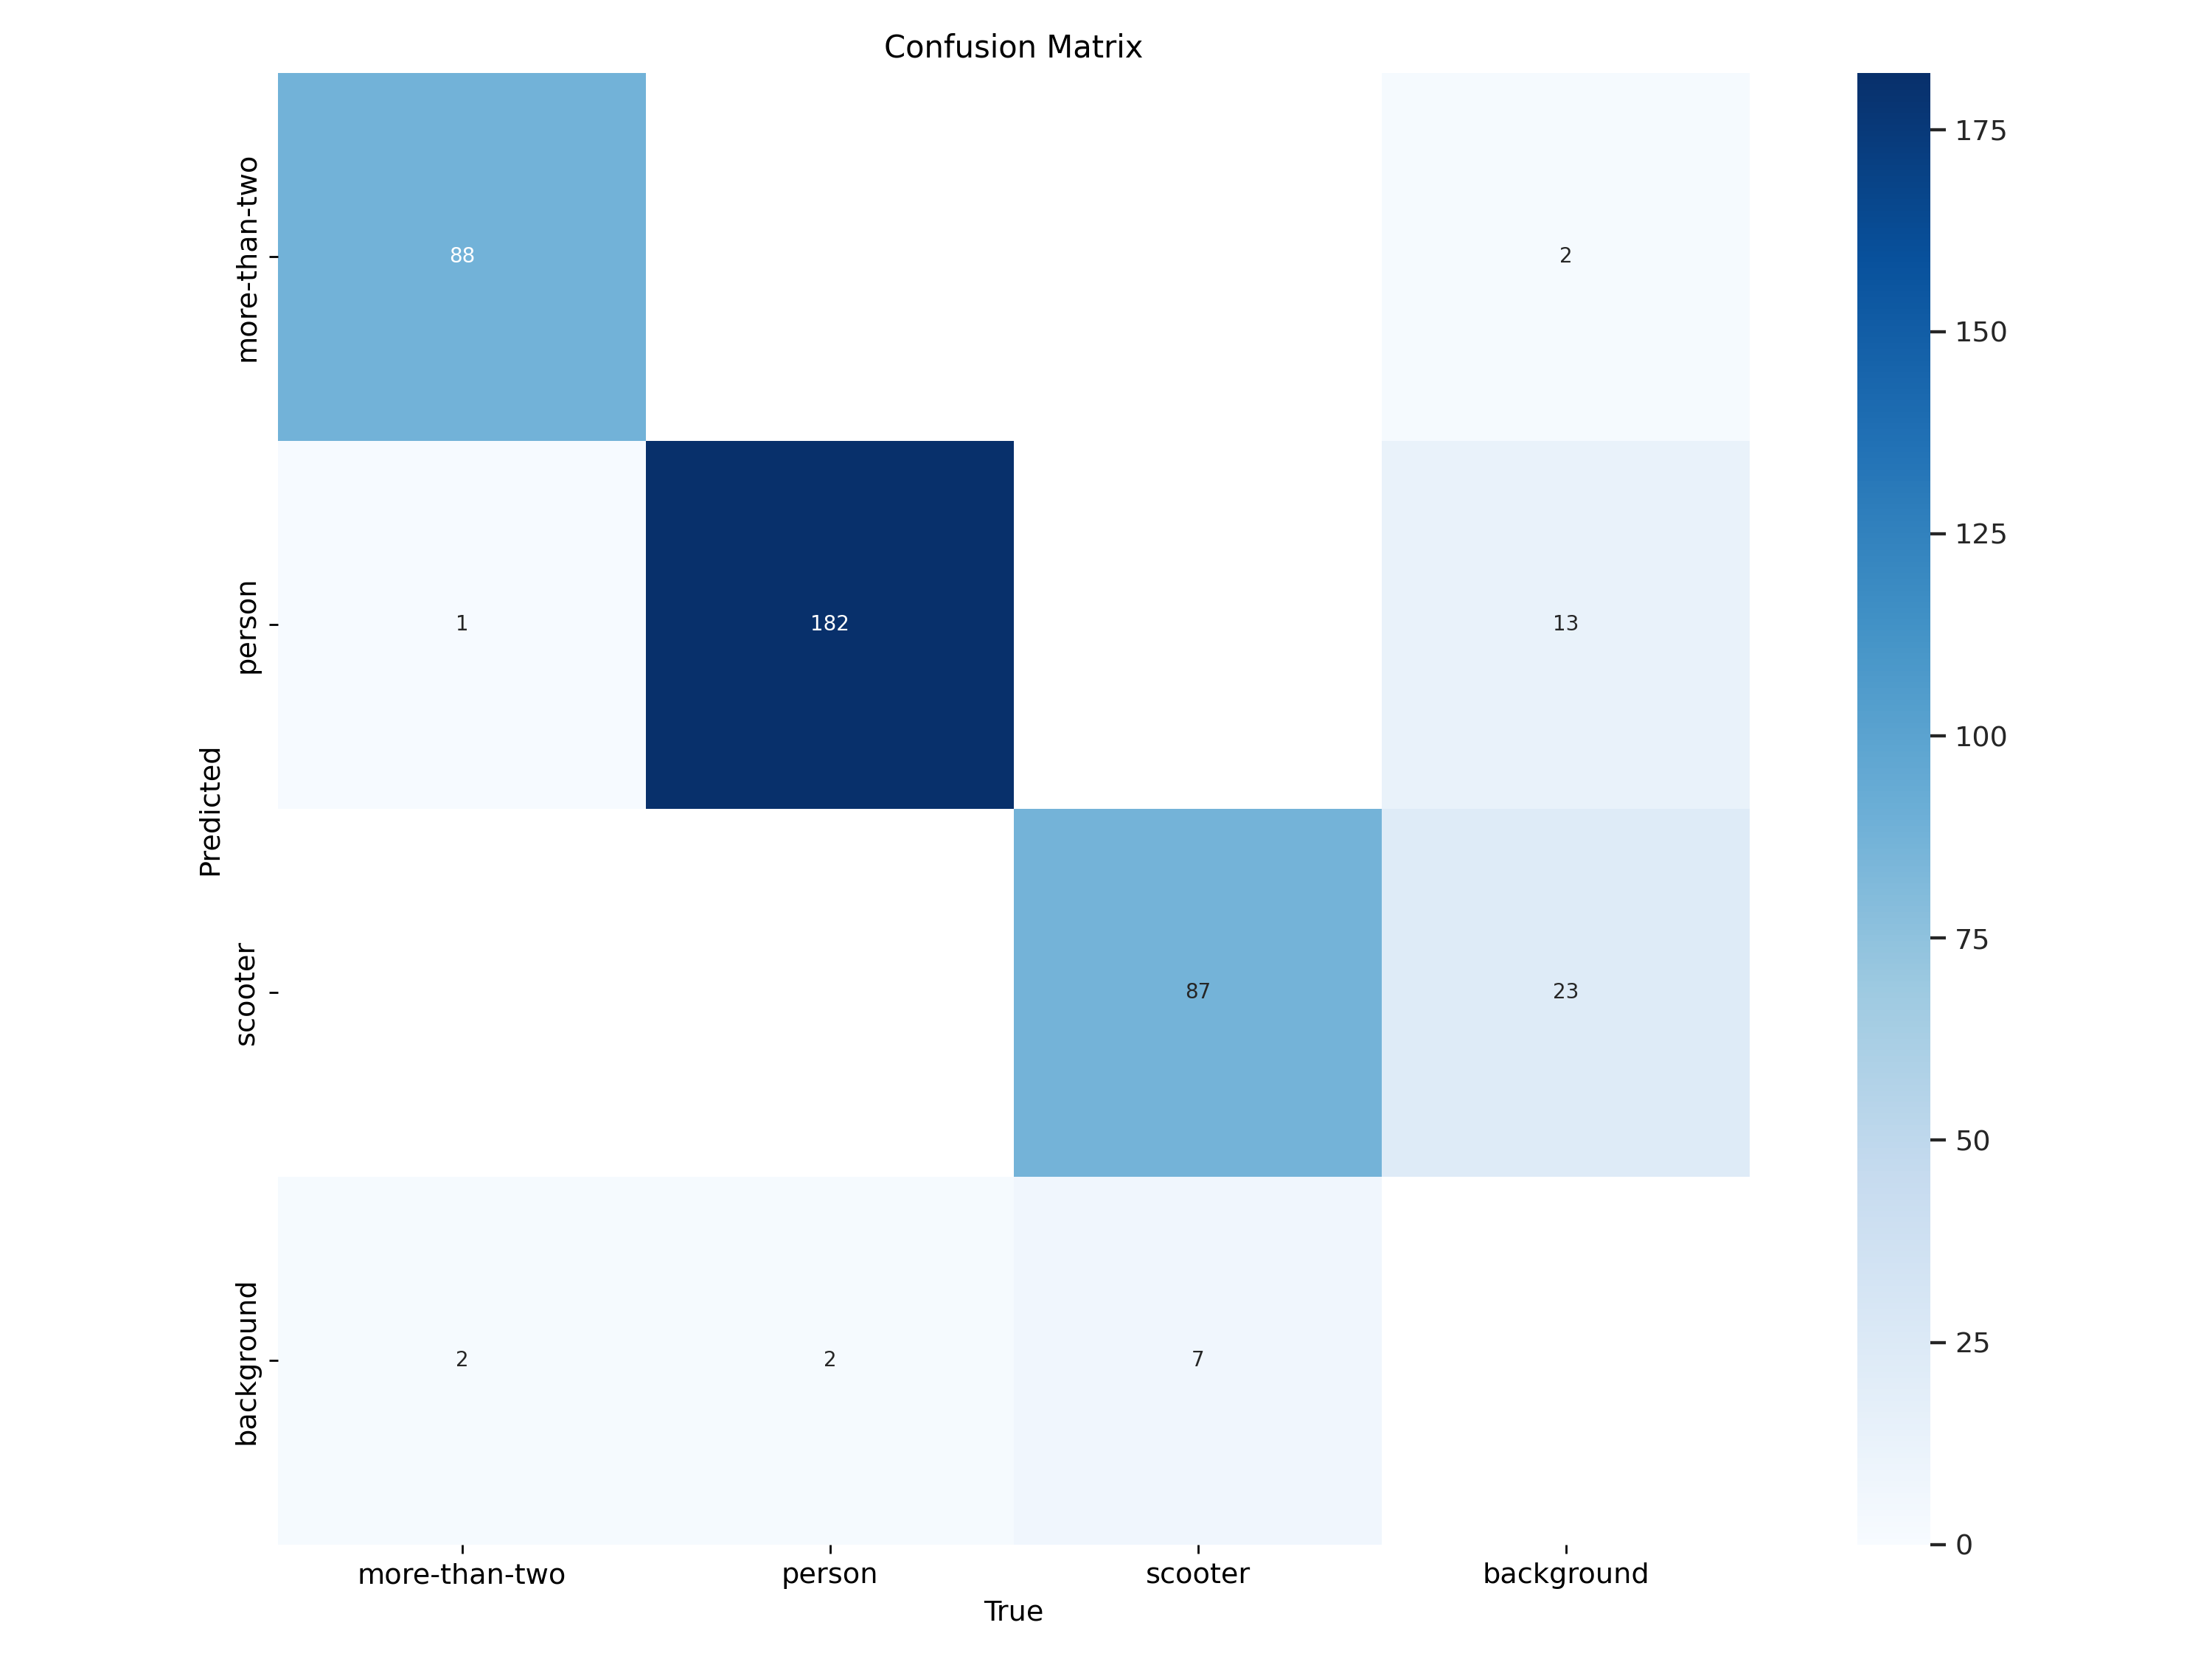

In [26]:
Image(filename=f'/content/전동킥보드-초과-인원-감지-프로젝트-4/train/runs/detect/train3/confusion_matrix.png', width=600)

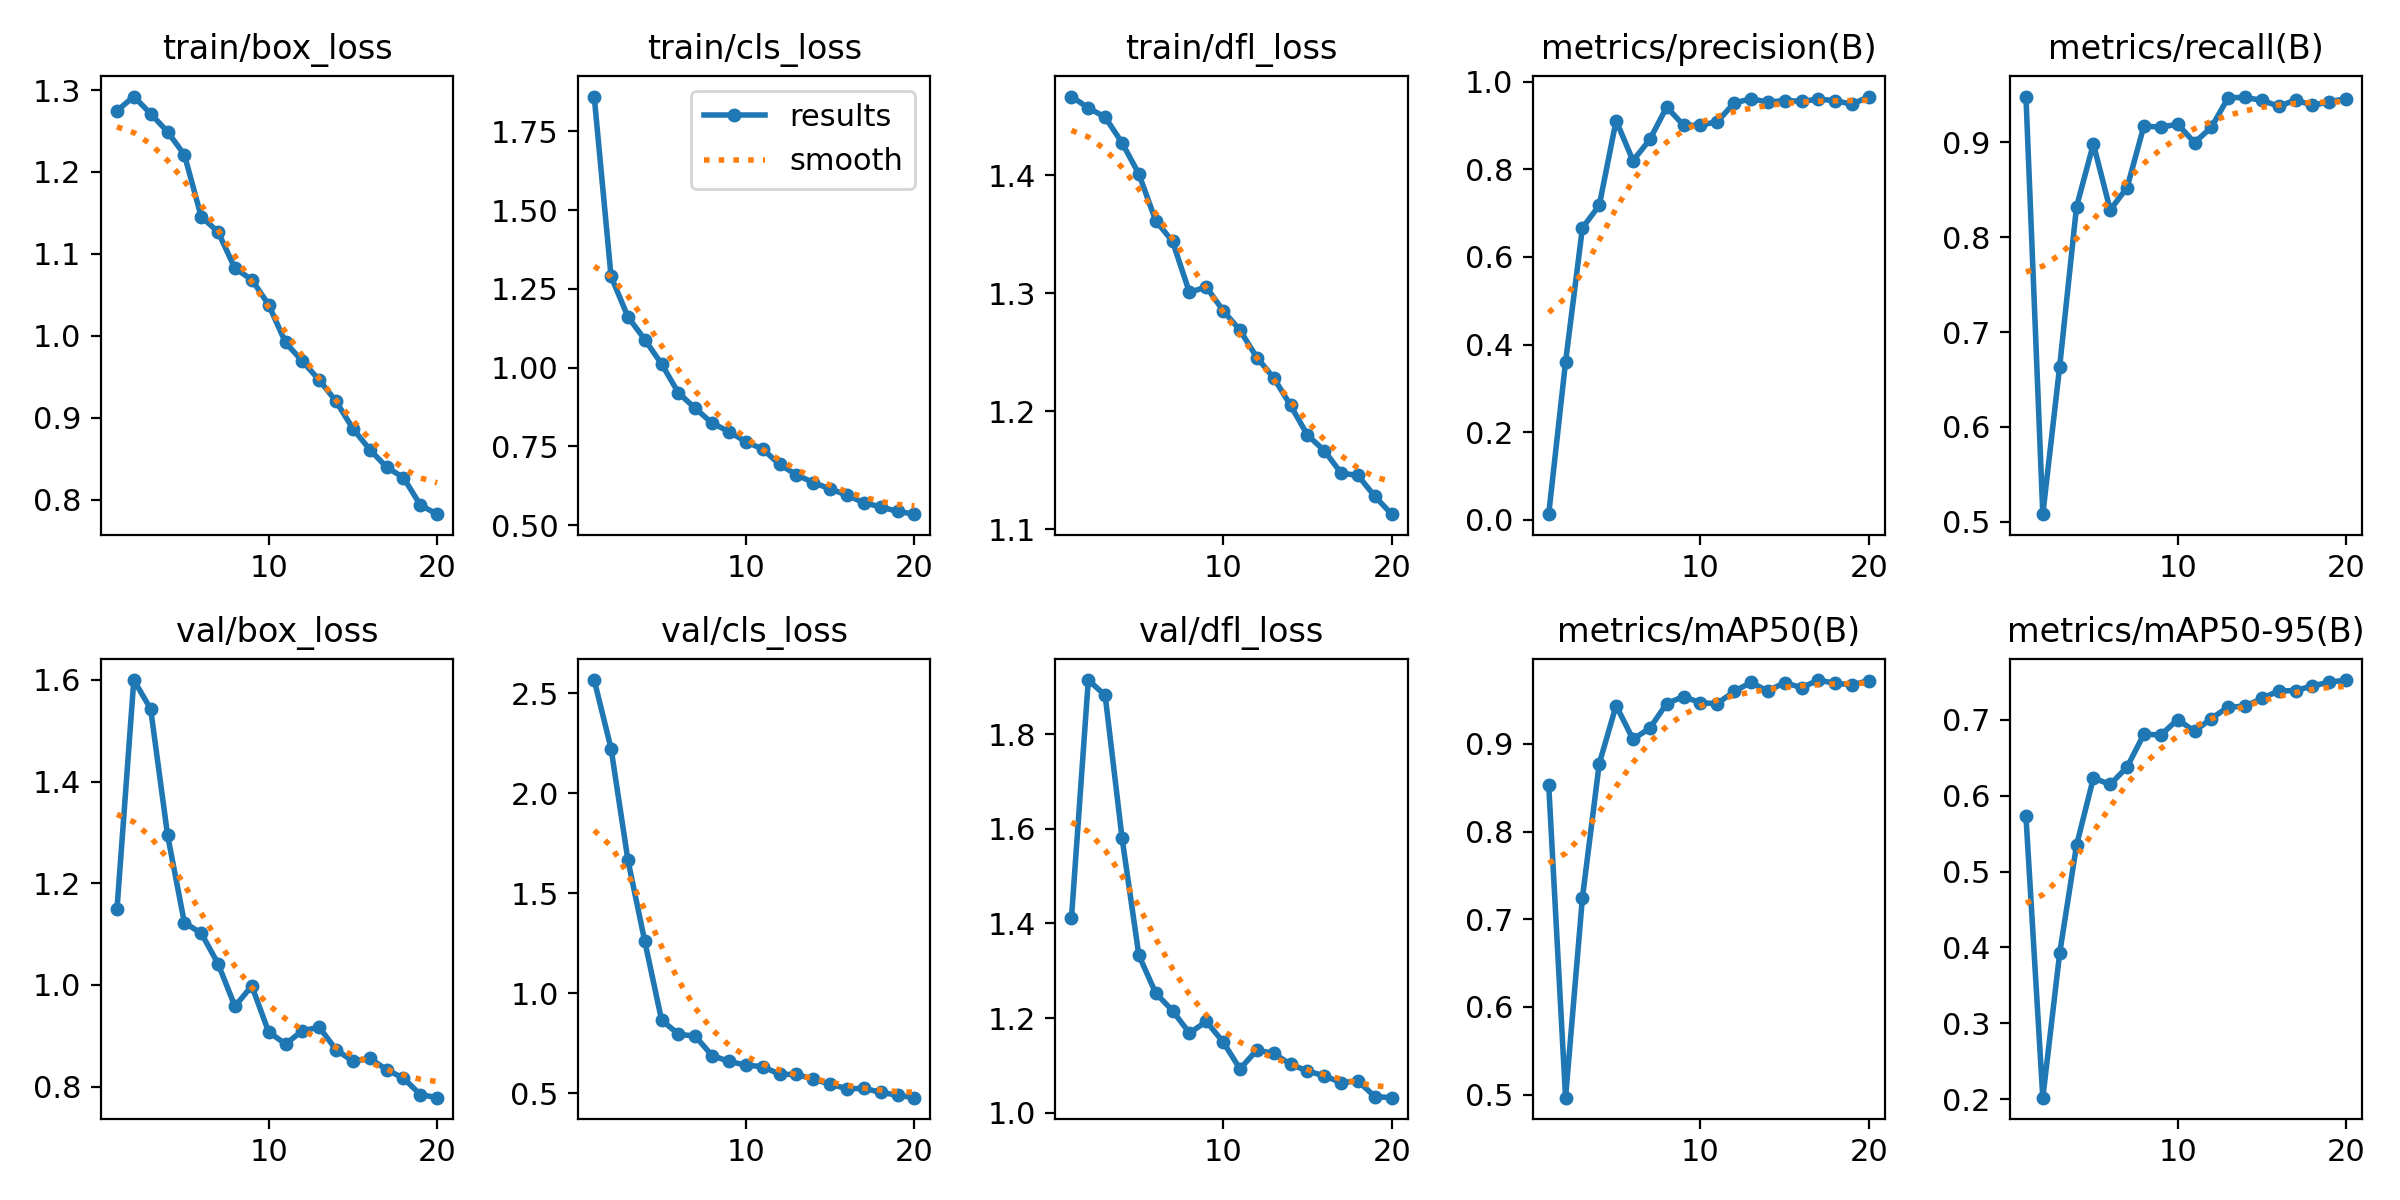

In [27]:
Image(filename=f'/content/전동킥보드-초과-인원-감지-프로젝트-4/train/runs/detect/train3/results.png', width=600)

In [29]:
from ultralytics import YOLO

model = YOLO('/content/전동킥보드-초과-인원-감지-프로젝트-4/train/runs/detect/train3/weights/best.pt')

result = model.predict(source='/content/전동킥보드-초과-인원-감지-프로젝트-4/200815_200764_2514.jpg', save = True)



image 1/1 /content/전동킥보드-초과-인원-감지-프로젝트-4/200815_200764_2514.jpg: 448x640 1 more-than-two, 3 persons, 2 scooters, 64.2ms
Speed: 3.2ms preprocess, 64.2ms inference, 931.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


In [30]:
from ultralytics import YOLO

def check_passenger_count(image_path, model_path):
    # 모델 로드
    model = YOLO(model_path)

    # 이미지에서 예측 수행
    results = model.predict(source=image_path)

    # 인원 수 카운트
    person_count = 0
    scooter_count = 0

    # 결과 분석
    for result in results:
        boxes = result.boxes
        for box in boxes:
            label = box.cls[0].item()
            confidence = box.conf[0].item()

            # 'person'과 'scooter' 클래스 확인
            if label == 'person' and confidence > 0.5:
                person_count += 1
            elif label == 'scooter' and confidence > 0.5:
                scooter_count += 1

    # 2인 이상 탑승 여부 확인
    if person_count > 2 and scooter_count > 0:
        return "true"
    else:
        return "false"

# 사용 예시
image_path = '/content/전동킥보드-초과-인원-감지-프로젝트-4/200815_200764_2514.jpg'  # 예측할 이미지 경로
model_path = '/content/전동킥보드-초과-인원-감지-프로젝트-4/train/runs/detect/train3/weights/best.pt'  # 모델 경로
result = check_passenger_count(image_path, model_path)
print(result)



image 1/1 /content/전동킥보드-초과-인원-감지-프로젝트-4/200815_200764_2514.jpg: 448x640 1 more-than-two, 3 persons, 2 scooters, 26.2ms
Speed: 2.4ms preprocess, 26.2ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
false


In [43]:
from ultralytics import YOLO

def check_more_than_two(image_path, model_path):
    # 모델 로드
    model = YOLO(model_path)

    # 이미지에서 예측 수행
    results = model.predict(source=image_path)

    # 결과 분석
    for result in results:
        boxes = result.boxes
        for box in boxes:
            label = box.cls[0].item()
            confidence = box.conf[0].item()

            # 'more-than-two' 클래스 확인
            if label == 2 and confidence > 0.5:  # 신뢰도 기준 설정
                return "true"

    return "false"

# 사용 예시
image_path = '/content/전동킥보드-초과-인원-감지-프로젝트-4/200815_200764_2514.jpg'  # 예측할 이미지 경로
model_path = '/content/전동킥보드-초과-인원-감지-프로젝트-4/train/runs/detect/train3/weights/best.pt'  # 모델 경로
result = check_more_than_two(image_path, model_path)
print(result)



image 1/1 /content/전동킥보드-초과-인원-감지-프로젝트-4/200815_200764_2514.jpg: 448x640 1 more-than-two, 3 persons, 2 scooters, 26.1ms
Speed: 2.2ms preprocess, 26.1ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
true


In [44]:
sudo apt update
sudo apt install python3-pip
pip3 install numpy opencv-python ultralytics torch torchvision torchaudio


SyntaxError: invalid syntax (<ipython-input-44-825e2fcbcfa3>, line 1)